<a href="https://colab.research.google.com/github/oliverturpo/APRENDIZAJE-SUPERVISADO/blob/main/Arbol_de_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import pandas as pd

datos = pd.read_csv("rendimiento_autos.csv")
datos.head()

,Automovil,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11
0,Apollo,18.90,350.0,165,260.0,8.0:1,2.56:1,4,3,200.3,69.9,3910,A
1,Omega,17.00,350.0,170,275.0,8.5:1,2.56:1,4,3,199.6,72.9,2860,A
2,Nova,20.00,250.0,105,185.0,8.25:1,2.73:1,1,3,196.7,72.2,3510,A
3,Monarch,18.25,351.0,143,255.0,8.0:1,3.00:1,2,3,199.9,74.0,3890,A
4,Duster,20.07,225.0,95,170.0,8.4:1,2.76:1,1,3,194.1,71.8,3365,M


In [32]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Automovil  32 non-null     object 
 1   y          32 non-null     float64
 2   x1         32 non-null     float64
 3   x2         32 non-null     int64  
 4   x3         30 non-null     float64
 5   x4         32 non-null     object 
 6   x5         32 non-null     object 
 7   x6         32 non-null     int64  
 8   x7         32 non-null     int64  
 9   x8         32 non-null     float64
 10  x9         32 non-null     float64
 11  x10        32 non-null     int64  
 12  x11        32 non-null     object 
dtypes: float64(5), int64(4), object(4)
memory usage: 3.4+ KB


In [33]:
datos.isna().sum()
datos['x3'].sum()

np.float64(6537.0)

In [34]:
datos['x3']= datos['x3'].fillna(datos['x3'].mean())

datos['x3'].isna().sum()

np.int64(0)

In [35]:
import pandas as pd

x11_dumies = pd.get_dummies(datos['x11'], dtype='int')
x11_dumies.head()

,A,M
0,1,0
1,1,0
2,1,0
3,1,0
4,0,1


In [37]:
x11_dumies=x11_dumies.drop('M', axis=1)
x11_dumies.head()

,A
0,1
1,1
2,1
3,1
4,0


In [38]:
datos.head()


,Automovil,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11
0,Apollo,18.90,350.0,165,260.0,8.0:1,2.56:1,4,3,200.3,69.9,3910,A
1,Omega,17.00,350.0,170,275.0,8.5:1,2.56:1,4,3,199.6,72.9,2860,A
2,Nova,20.00,250.0,105,185.0,8.25:1,2.73:1,1,3,196.7,72.2,3510,A
3,Monarch,18.25,351.0,143,255.0,8.0:1,3.00:1,2,3,199.9,74.0,3890,A
4,Duster,20.07,225.0,95,170.0,8.4:1,2.76:1,1,3,194.1,71.8,3365,M


In [51]:
X = datos.drop(['Automovil', 'x4', 'x5', 'x11'], axis=1, errors='ignore')
X = X.join(x11_dumies)
X = X.rename(columns={'A': 'x11_dummies'})

X.head()
y = datos['y']

In [52]:
X_ent, X_prue, Y_ent, Y_prue = train_test_split(X, y, test_size=0.2, random_state=42)

In [63]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [79]:
arbol = DecisionTreeRegressor(max_depth=4, random_state=30)
arbol.fit(X_ent, Y_ent)

DecisionTreeRegressor(max_depth=4, random_state=30)

In [80]:
Y_pred = arbol.predict(X_prue)
r2 = r2_score(Y_prue, Y_pred)
r2

0.9736097145769296

In [81]:

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

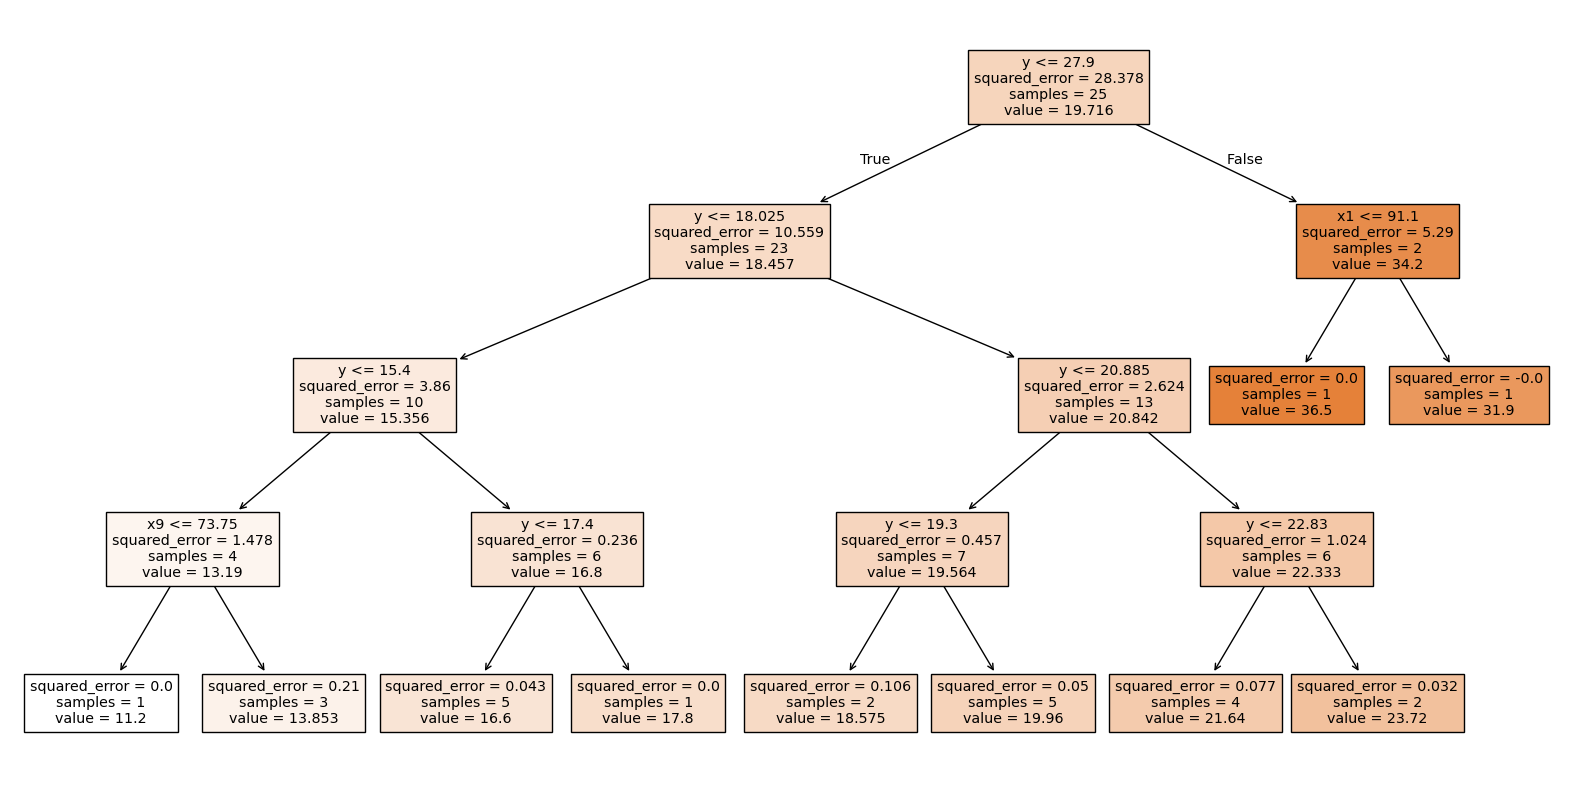

In [82]:
plt.figure(figsize=(20,10))
plot_tree(arbol, feature_names=X.columns, filled=True)
plt.show()

In [87]:
display(X.iloc[0])

,0
y,18.9
x1,350.0
x2,165.0
x3,260.0
x6,4.0
x7,3.0
x8,200.3
x9,69.9
x10,3910.0
x11_dummies,1.0
